In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
mpg %>% print

# A tibble: 234 × 11
   manufacturer model      displ  year   cyl trans drv     cty   hwy fl    class
   <chr>        <chr>      <dbl> <int> <int> <chr> <chr> <int> <int> <chr> <chr>
 1 audi         a4           1.8  1999     4 auto… f        18    29 p     comp…
 2 audi         a4           1.8  1999     4 manu… f        21    29 p     comp…
 3 audi         a4           2    2008     4 manu… f        20    31 p     comp…
 4 audi         a4           2    2008     4 auto… f        21    30 p     comp…
 5 audi         a4           2.8  1999     6 auto… f        16    26 p     comp…
 6 audi         a4           2.8  1999     6 manu… f        18    26 p     comp…
 7 audi         a4           3.1  2008     6 auto… f        18    27 p     comp…
 8 audi         a4 quattro   1.8  1999     4 manu… 4        18    26 p     comp…
 9 audi         a4 quattro   1.8  1999     4 auto… 4        16    25 p     comp…
10 audi         a4 quattro   2    2008     4 manu… 4        20    28 p     comp…
# … wit

In [2]:
#tidyr is where pivot longer comes from  Also don't forget about slice_max it came up again

mpg_longer = 
    mpg %>%
        mutate(id = row_number()) %>%
            pivot_longer(cols = c(cty, hwy), names_to = 'label') #c(..) allows us to specify a series of value
mpg_longer %>% head

manufacturer,model,displ,year,cyl,trans,drv,fl,class,id,label,value
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
audi,a4,1.8,1999,4,auto(l5),f,p,compact,1,cty,18
audi,a4,1.8,1999,4,auto(l5),f,p,compact,1,hwy,29
audi,a4,1.8,1999,4,manual(m5),f,p,compact,2,cty,21
audi,a4,1.8,1999,4,manual(m5),f,p,compact,2,hwy,29
audi,a4,2.0,2008,4,manual(m6),f,p,compact,3,cty,20
audi,a4,2.0,2008,4,manual(m6),f,p,compact,3,hwy,31


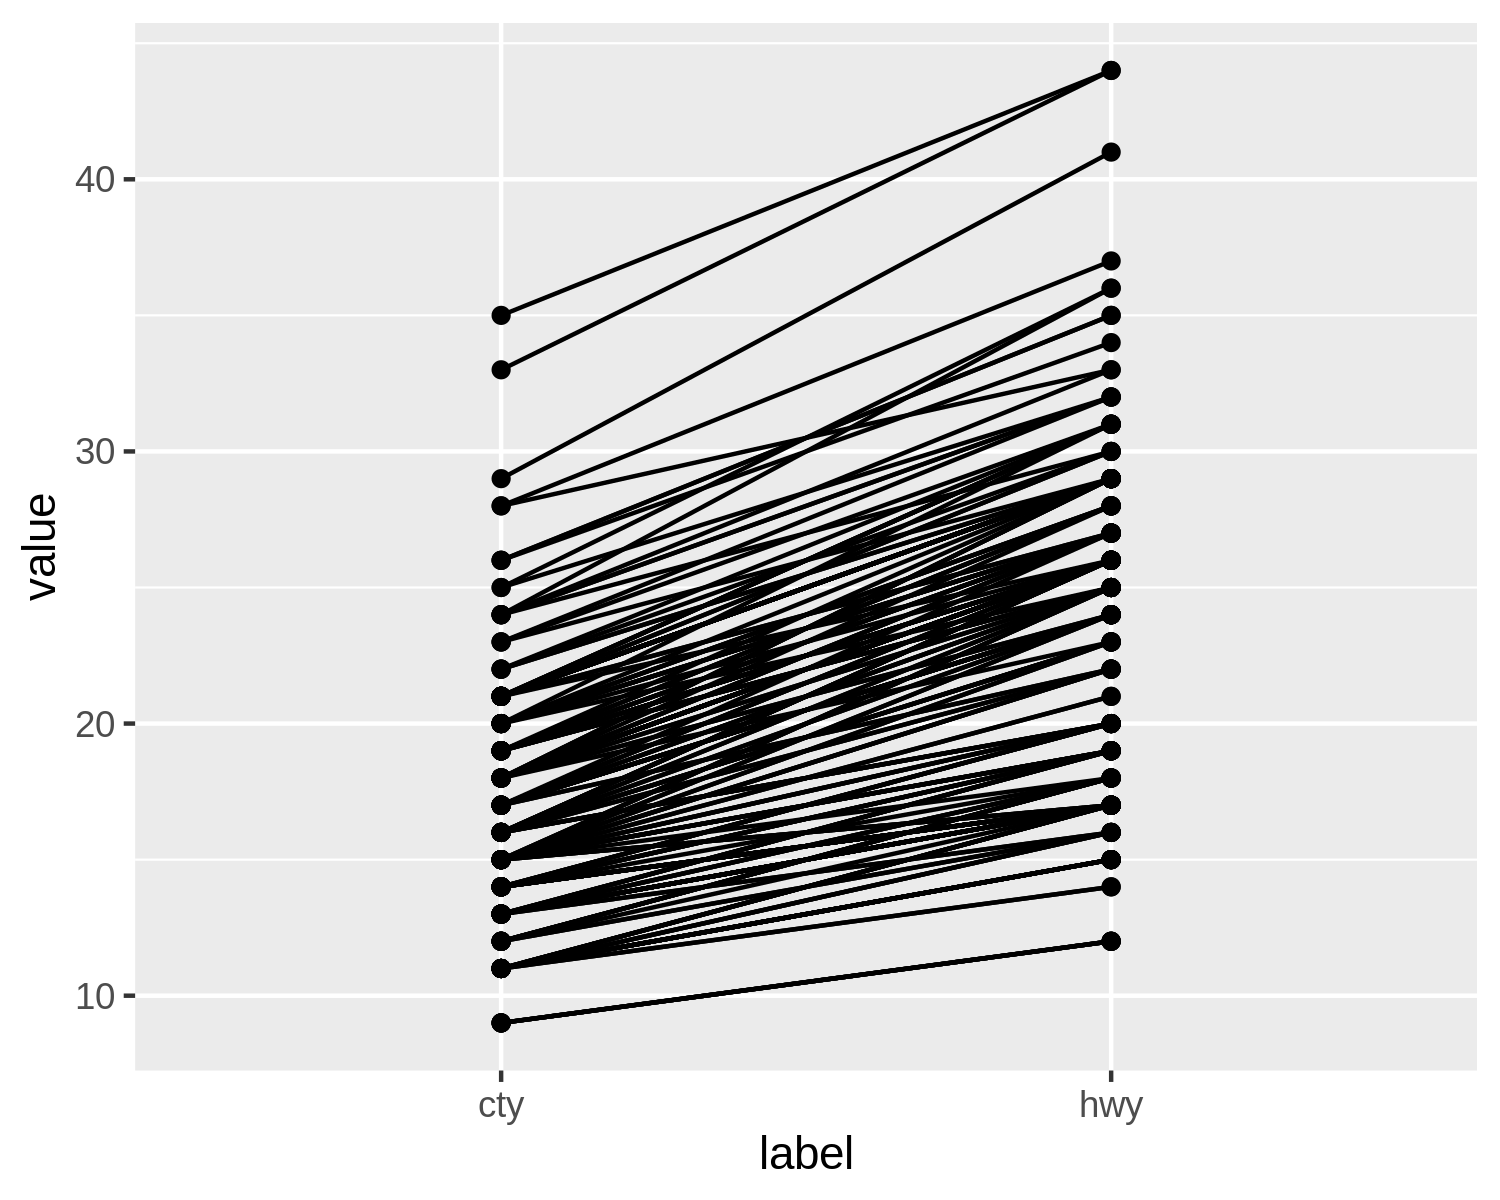

In [3]:
p = ggplot(mpg_longer, aes(x = label, y = value, group = id))

p = p + geom_point()

p = p + geom_line()

p

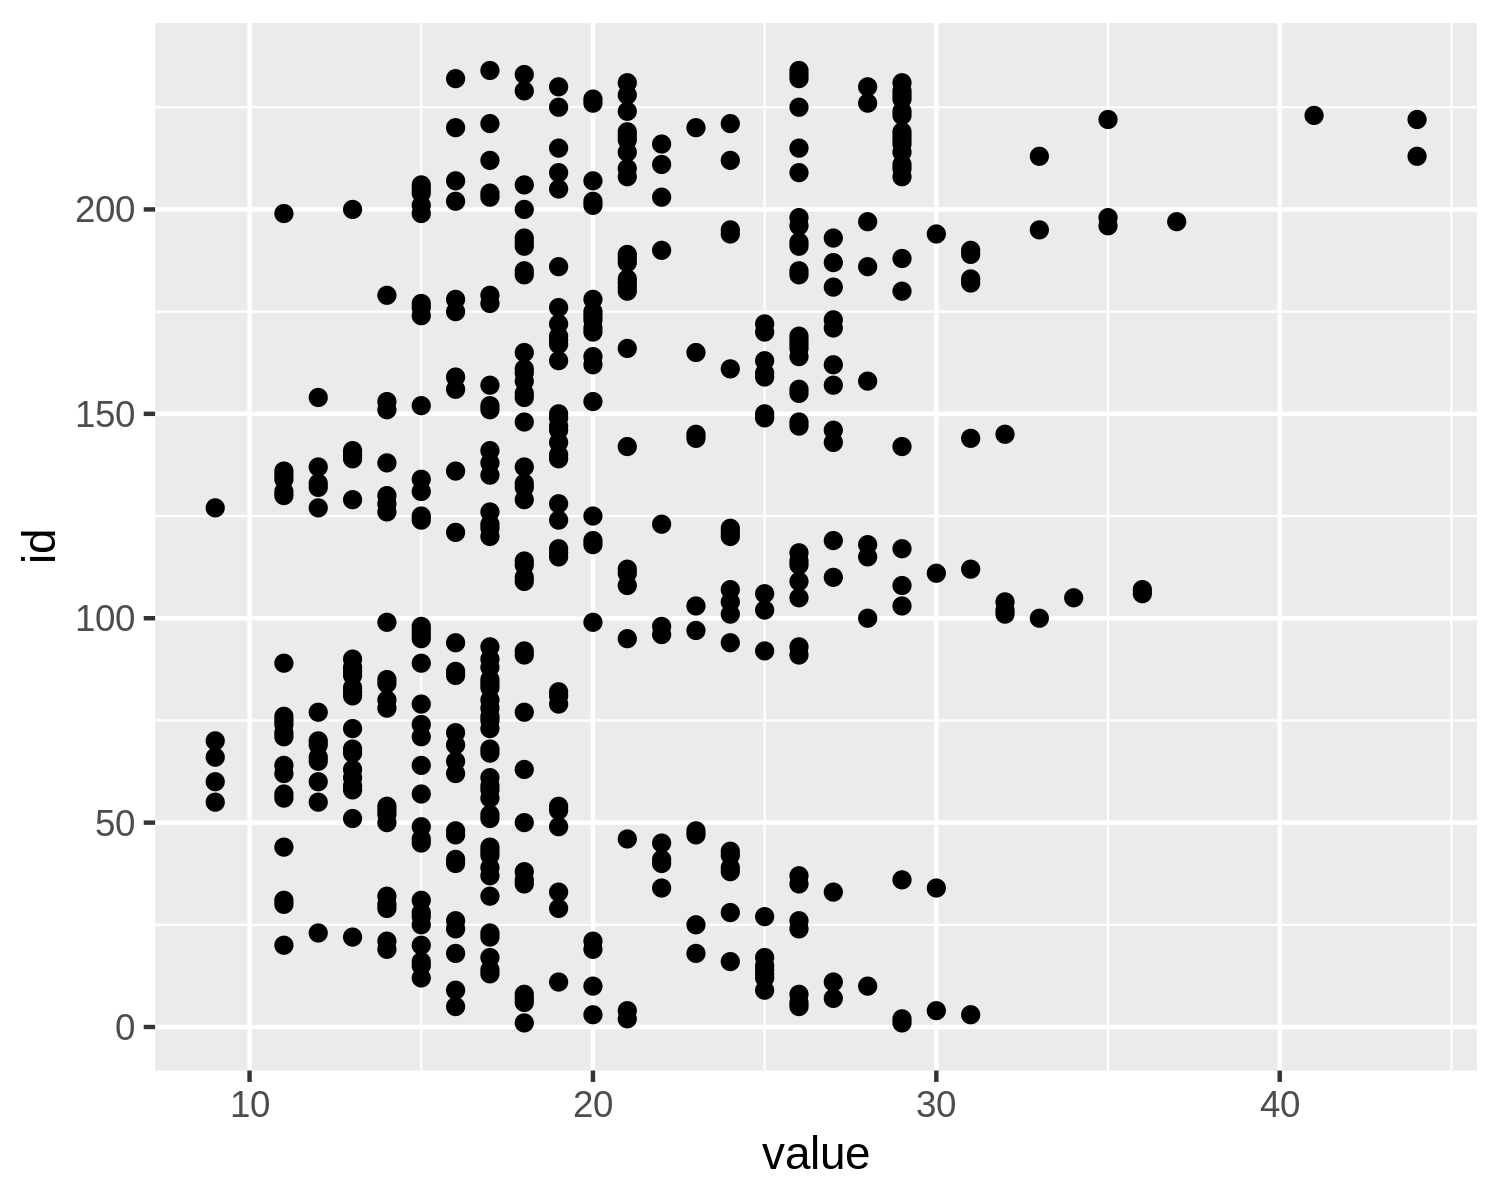

In [4]:
p = ggplot(mpg_longer, aes(x = value, y = id))

p = p + geom_point()

p

In [10]:
# He said maybe we can plot the top 10 ids
top_10_ids = 
mpg_longer %>% 
        pivot_wider(names_from = label, values_from = value) %>%
            slice_max(cty, n= 10) %>% 
                pull(id)

top_10_ids

#Now we can take these and filter the mpg longer data

mpg_long_10 = 
    mpg_longer %>%
        filter(id %in% top_10_ids)

[1] 222 213 223 100 197 105 196 198 102 106

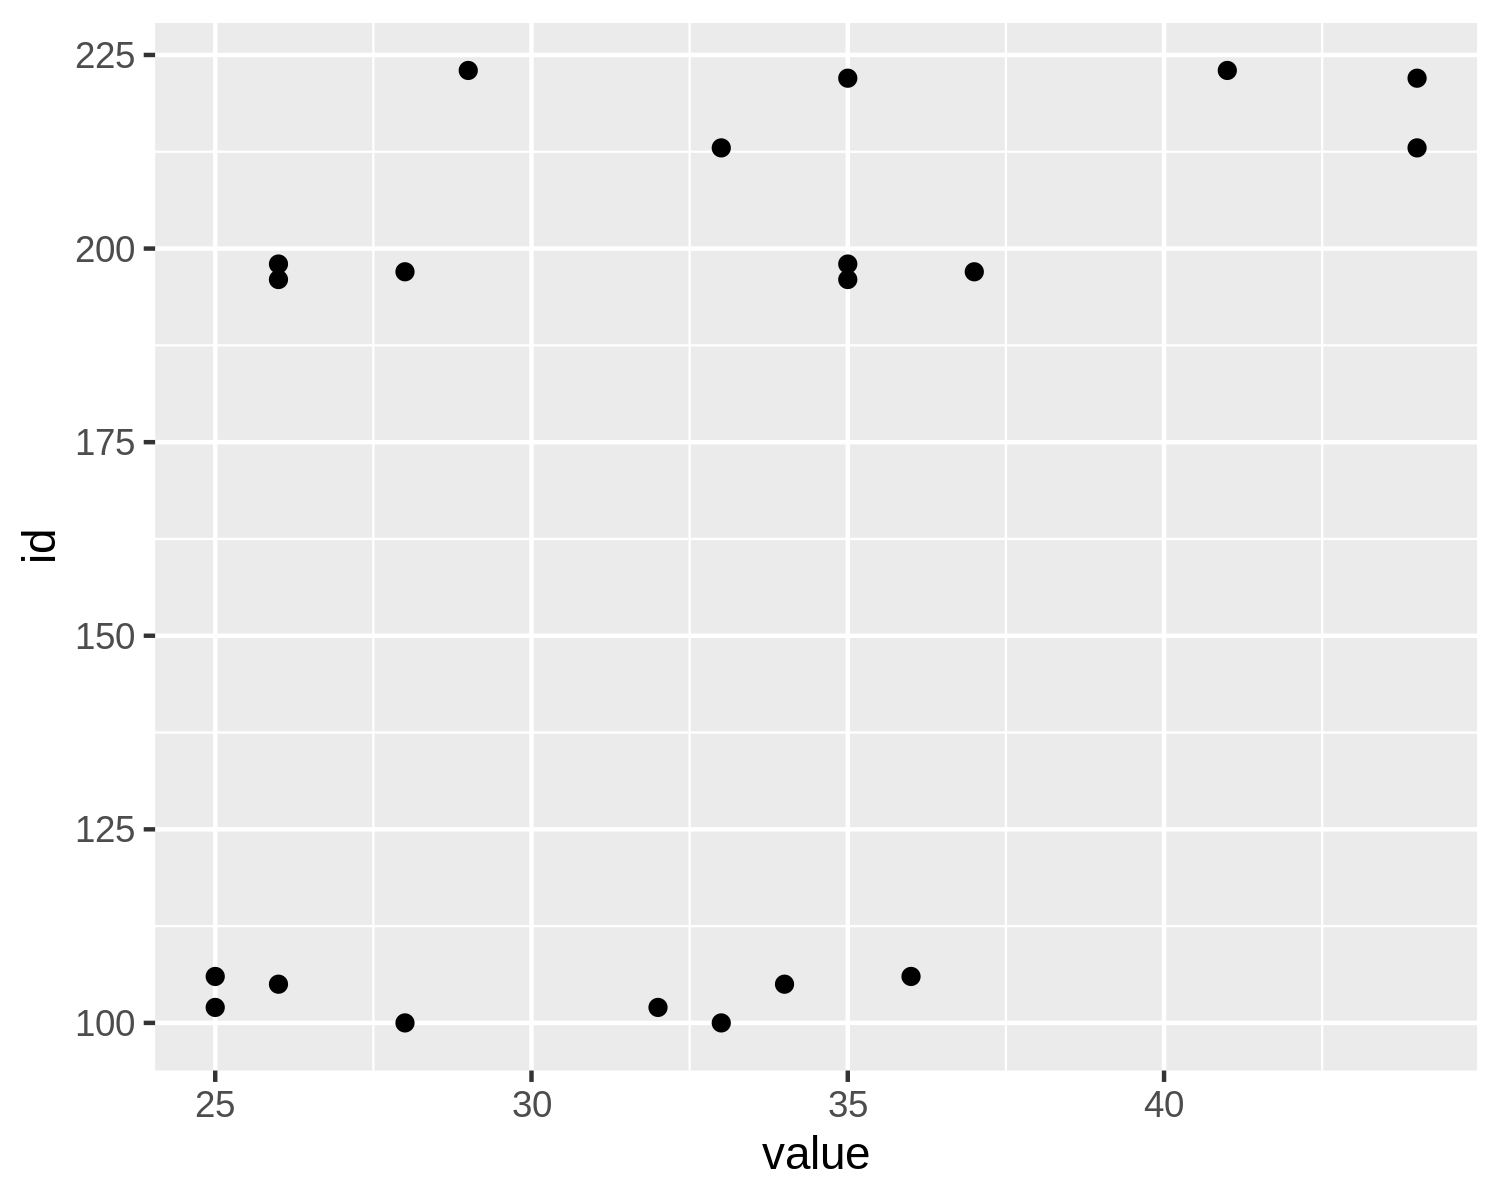

In [14]:
p = ggplot(mpg_long_10, aes(x = value,id))

p = p + geom_point()

p
#Notice the massive gap that's because ggplot treats this like a number but we want it to see tis as a character

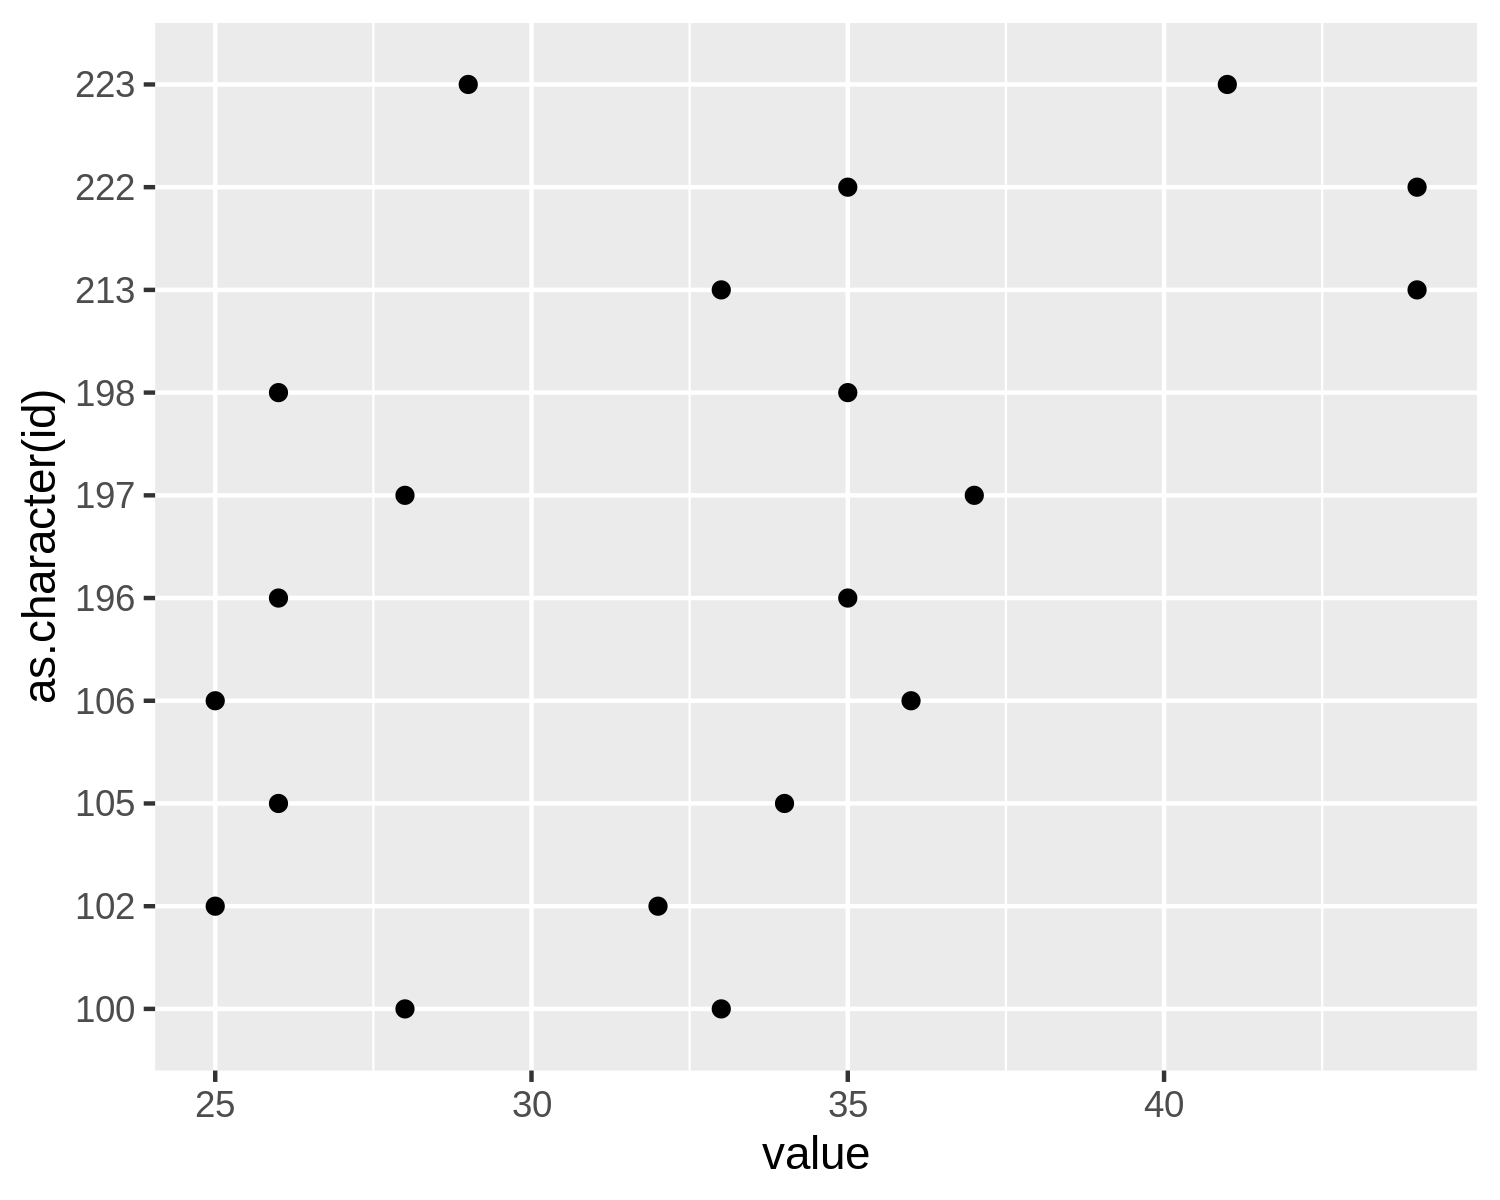

In [15]:
p = ggplot(mpg_long_10, aes(x = value, y = as.character(id)))

p = p + geom_point()

p
#Fixed the gap but we can also use forcats

In [18]:
#as.character is very useful
 mpg_10_char =    mpg_longer %>%
        filter(id %in% top_10_ids) %>%
            mutate(id = fct_reorder(as.character(id), value,max))

# To make lines we actually cannot use geom_line because we have 2 x values that are the same for each y value
# He suggests using geom_segment

In [25]:
mpg_wider_ID = 
mpg_longer %>% 
        pivot_wider(names_from = label, values_from = value) %>%
            slice_max(cty, n= 10) %>%
                mutate(id = as.character(id)) #Before we did this it looked very weird... you can check by removing this and seeing what the plot looked like


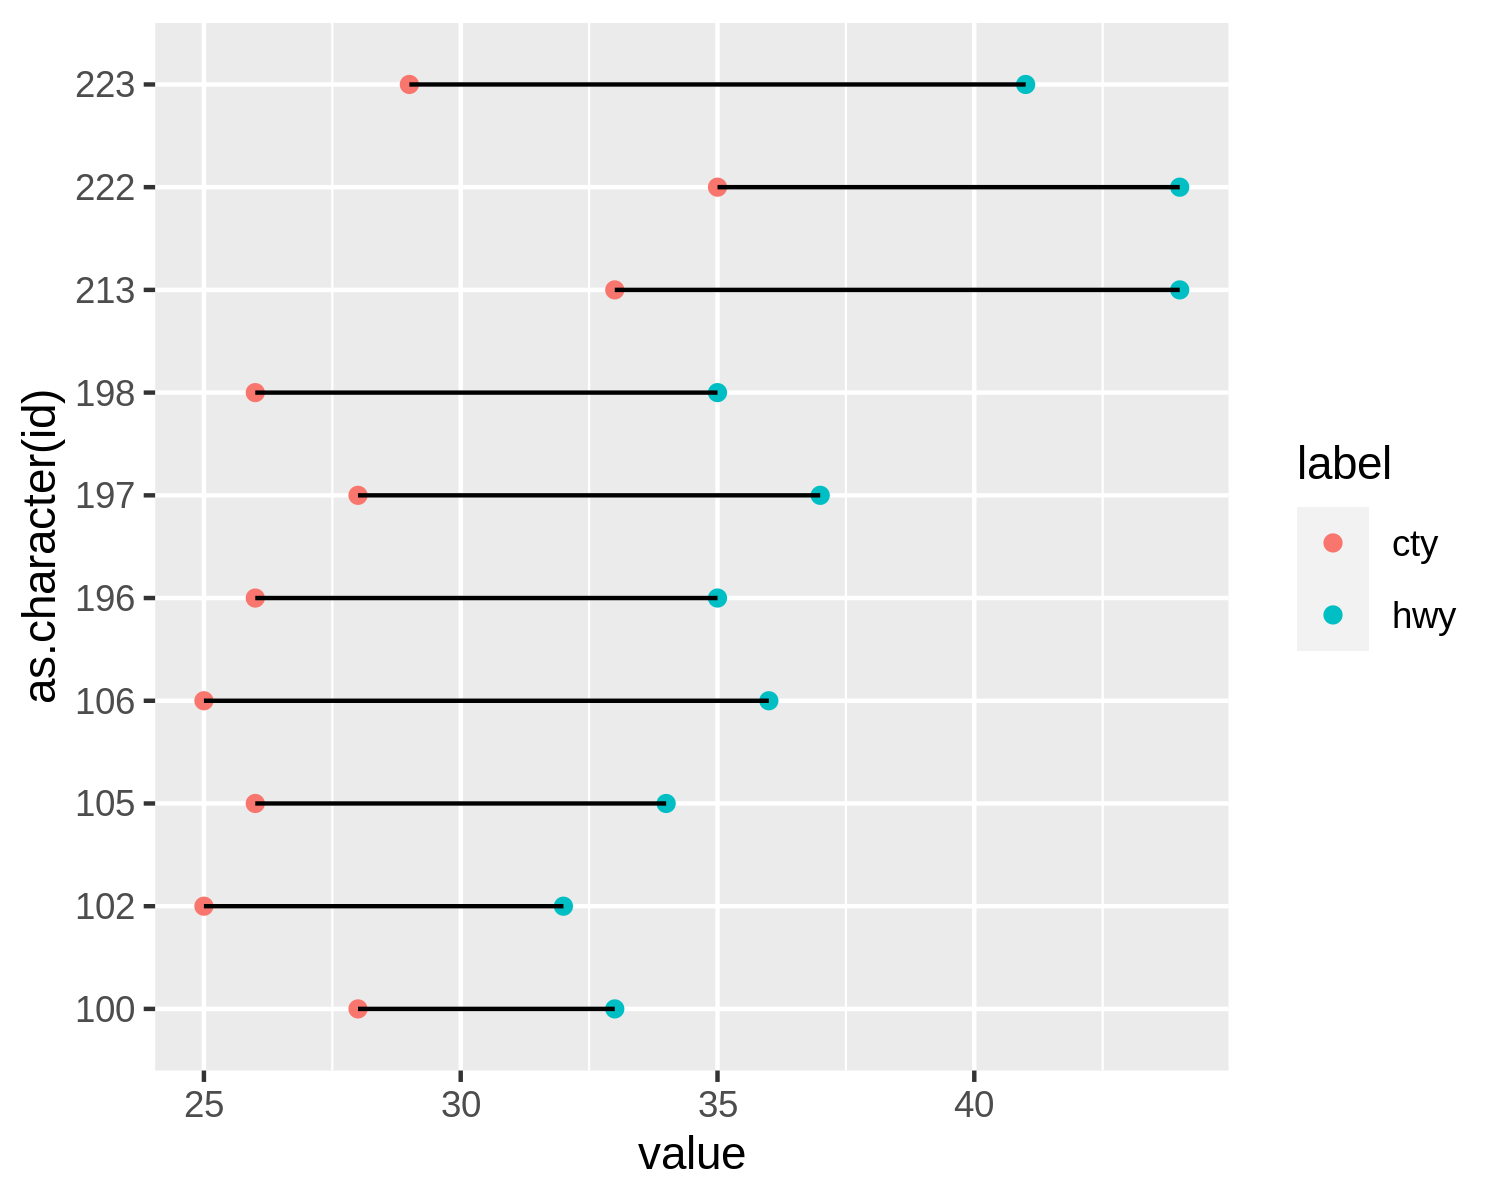

In [31]:
p = ggplot(mpg_long_10, aes(x = value, y = as.character(id)))

p = p + geom_point(mapping = aes(color = label))

p = p + geom_segment(mpg_wider_ID, mapping = aes(x = cty, xend = hwy, y = id, yend = id))

p